In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
#drive.flush_and_unmount()

In [0]:
import sys
#ROOT_PATH = '/content/drive/My Drive/NLP/project/code/'
ROOT_PATH = '/content/drive/My Drive/university/projects/NLP/project/code/'
sys.path.append(ROOT_PATH)

In [0]:
ROOT_PATH_DATA = f"{ROOT_PATH}data/"
ROOT_PATH_ORIGIN_DATA = f'{ROOT_PATH_DATA}kaggle-fake+real/'

In [6]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
from pathlib import Path
!pip install empath
from utils.preprocessing import *
from utils.data_utils import *
from IPython.display import display
import seaborn as sns
#nltk.download('stopwords')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Create base data

In [0]:
combined_csv = pd.read_csv(f"{ROOT_PATH_ORIGIN_DATA}train.csv")

In [0]:
display(combined_csv)
display(combined_csv.info())

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
id        20800 non-null int64
title     20242 non-null object
author    18843 non-null object
text      20761 non-null object
label     20800 non-null int64
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


None

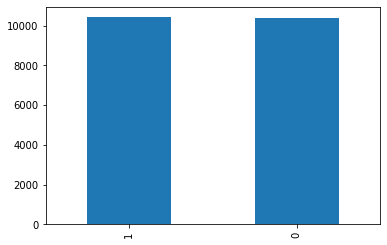

In [0]:
combined_csv['label'].value_counts().plot.bar()

# Add Feaures

In [0]:
combined_csv = combined_csv[combined_csv['text'].notna()]

In [0]:
combined_csv['text_tokenized'] = combined_csv['text'].apply(text_to_wordlist)

In [0]:
path_data_tokenized = Path(f"{ROOT_PATH_DATA}preprocessed/kaggle-fake+real/combined_data_tokenized.csv")
combined_csv.to_csv(path_data_tokenized, index=False)

In [0]:
combined_csv['text_tokenized'].isna().sum()

0

In [0]:
combined_csv[["article_length", "total_sentences", "avg_sent_length", "word_count", "number_count",
"avg_word_length", "count_pos_adj", "count_pos_sl", "count_exclamation",
"count_date", "allCapsCount"]] =\
    combined_csv.apply(lexical_features_extraction, result_type='expand', axis=1)

In [0]:
int_colunms = ['article_length', 'total_sentences', 'word_count','number_count', 'count_pos_adj', 'count_pos_sl','count_exclamation', 'count_date', 'allCapsCount']
combined_csv[int_colunms] = combined_csv[int_colunms].astype('int32')
combined_csv.to_csv(path_data_tokenized, index=False)

# Sentiment + Categories Features:

In [0]:
categories_cols_names = ['catLaw','catCommunication', 'catCrime', 'catPayment',
                    'catPhone', 'catBanking', 'catWar', 'catEconomics', 
                    'catPolitics', 'catLeader', 'catSocialMedia', 'catSchool',
                    'catGovernment', 'catMoney', 'catWork', 'catSpeaking', 
                    'catInternet', 'catBusiness']

categories_names = ('law','communication', 'crime', 'payment', 'phone', 
                         'banking', 'war', 'economics', 'politics', 'leader', 
                         'social_media', 'school','government', 'money', 'work',
                         'speaking', 'internet', 'business')

sentiment_cols_names = ['sentNeg', 'sentNeutral', 'sentPos', 'sentCompound']

In [0]:
combined_csv[categories_cols_names] = combined_csv.apply(lambda row: categories_extraction(row.text), axis=1, result_type='expand')
combined_csv[sentiment_cols_names] = combined_csv.apply(lambda row: sentiment_extraction(row.text), axis=1, result_type='expand')

In [0]:
combined_csv.to_csv(path_data_tokenized, index=False)
path_data_tokenized_sample = Path(f"{ROOT_PATH_DATA}preprocessed/kaggle-fake+real/combined_data_tokenized_sample.csv")
combined_csv.sample(frac=0.7,random_state=1).to_csv(path_data_tokenized_sample, index=False)
path_data_tokenized_shuffle = Path(f"{ROOT_PATH_DATA}preprocessed/kaggle-fake+real/combined_data_tokenized_shuffled.csv")
combined_csv.sample(frac=1,random_state=1).to_csv(path_data_tokenized_shuffle, index=False)

In [0]:
path_data_tokenized = Path(f"{ROOT_PATH_DATA}preprocessed/kaggle-fake+real/combined_data_tokenized.csv")
df = pd.read_csv(path_data_tokenized)

In [0]:
def plot_corr_matrix(combined_csv):
  # Compute the correlation matrix
  corr = combined_csv.corr()
  # Generate a mask for the upper triangle
  mask = np.triu(np.ones_like(corr, dtype=np.bool))
  f, ax = plt.subplots(figsize=(11, 9))
  cmap = sns.diverging_palette(220, 10, as_cmap=True) # Generate a custom diverging colormap
  # Draw the heatmap with the mask and correct aspect ratio
  sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
              square=True, linewidths=.5, cbar_kws={"shrink": .5})
  plt.show()
  sns.heatmap(corr)
  plt.show()

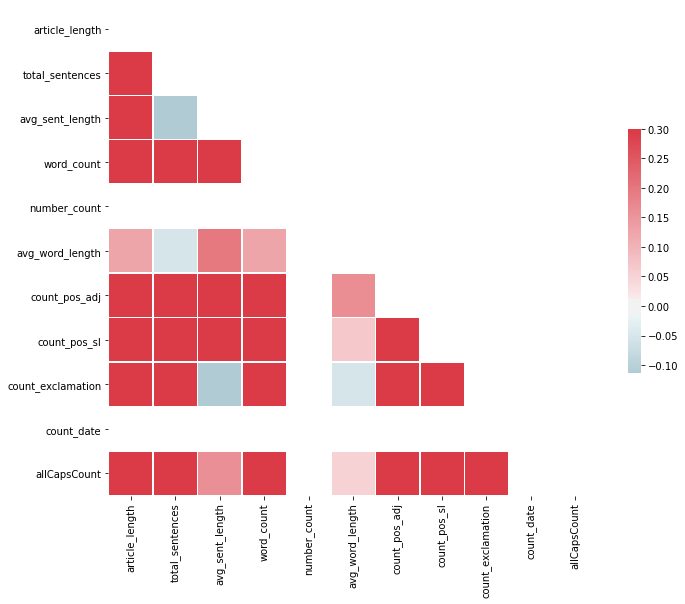

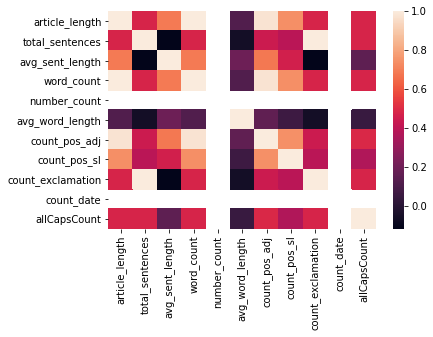

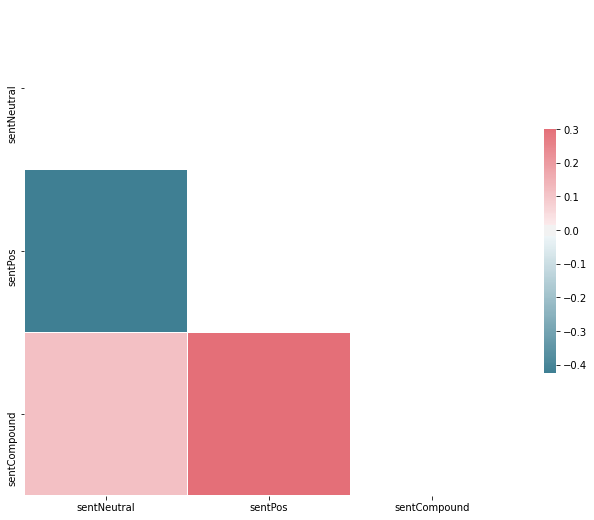

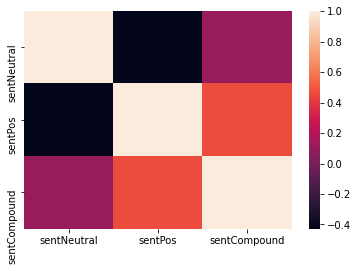

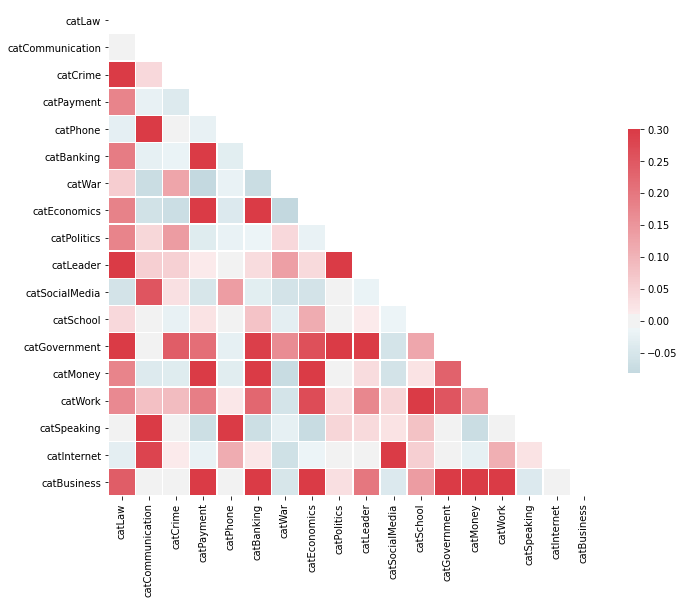

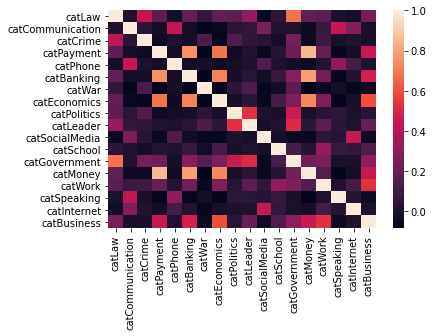

In [9]:
lexical = ["article_length", "total_sentences", 
"avg_sent_length", "word_count", "number_count",
"avg_word_length", "count_pos_adj", "count_pos_sl", 
"count_exclamation", "count_date", "allCapsCount"]

category = ["catLaw","catCommunication", "catCrime","catPayment",
                       "catPhone", "catBanking", "catWar", "catEconomics",
                       "catPolitics", "catLeader", "catSocialMedia", "catSchool", 
                       "catGovernment","catMoney","catWork", "catSpeaking",
                       "catInternet", "catBusiness"]

sentiment = ["sentNeutral","sentPos","sentCompound"]

features = {"lexical":lexical
          ,"sentiment":sentiment,
          "category":category}
          
for feat_name,feat_list in features.items():
  plot_corr_matrix(df[feat_list])
  